In [59]:
#Import the required modules for vectors and matrix operations, data generation
import numpy as np
#Import the required modules for plot creation:
import matplotlib.pyplot as plt
#import the required modules for TimeSeries data generation:
import statsmodels.api as sm
#Import the required modules for test statistic calculation:
import statsmodels.stats as sm_stat
#Import the required modules for model estimation:
import statsmodels.tsa as smt
#Import formula specification
import statsmodels.formula.api as smf
# Import pandas dataset
import pandas as pd

In [60]:
def tsdisplay(y, figsize = (14, 8), title = "", lags = 20):
    tmp_data = pd.Series(y)
    fig = plt.figure(figsize = figsize)
    #Plot the time series
    tmp_data.plot(ax = fig.add_subplot(311), title = "$Time\ Series\ " + title + "$", legend = False)
    #Plot the ACF:
    sm.graphics.tsa.plot_acf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(323))
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the PACF:
    sm.graphics.tsa.plot_pacf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(324))
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the QQ plot of the data:
    sm.qqplot(tmp_data, line='s', ax = fig.add_subplot(325)) 
    plt.title("QQ Plot")
    #Plot the residual histogram:
    fig.add_subplot(326).hist(tmp_data, bins = 40, normed = 1)
    plt.title("Histogram")
    #Fix the layout of the plots:
    plt.tight_layout()
    plt.show()

In [61]:
def tsdiag(y, figsize = (14,8), title = "", lags = 10):
    #The data:
    tmp_data = pd.Series(y)
    #The Ljung-Box test results for the first k lags:
    tmp_acor = list(sm_stat.diagnostic.acorr_ljungbox(tmp_data, lags = lags, boxpierce = True))
    # get the p-values
    p_vals = pd.Series(tmp_acor[1])
    #Start the index from 1 instead of 0 (because Ljung-Box test is for lag values from 1 to k)
    p_vals.index += 1
    fig = plt.figure(figsize = figsize)
    #Plot the p-values:
    p_vals.plot(ax = fig.add_subplot(313), linestyle='', marker='o', title = "p-values for Ljung-Box statistic", legend = False)
    #Add the horizontal 0.05 critical value line
    plt.axhline(y = 0.05, color = 'blue', linestyle='--')
    # Annotate the p-value points above and to the left of the vertex
    x = np.arange(p_vals.size) + 1
    for X, Y, Z in zip(x, p_vals, p_vals):
        plt.annotate(round(Z, 4), xy=(X,Y), xytext=(-5, 5), ha = 'left', textcoords='offset points')
    plt.show()
    # Return the statistics:
    col_index = ["Ljung-Box: X-squared", "Ljung-Box: p-value", "Box-Pierce: X-squared", "Box-Pierce: p-value"]
    return pd.DataFrame(tmp_acor, index = col_index, columns = range(1, len(tmp_acor[0]) + 1))

In [62]:
airpass = sm.datasets.get_rdataset("AirPassengers", "datasets")

In [63]:
print(airpass.__doc__)

============= ===============
AirPassengers R Documentation
============= ===============

Monthly Airline Passenger Numbers 1949-1960
-------------------------------------------

Description
~~~~~~~~~~~

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

Usage
~~~~~

::

   AirPassengers

Format
~~~~~~

A monthly time series, in thousands.

Source
~~~~~~

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time Series
Analysis, Forecasting and Control.* Third Edition. Holden-Day. Series G.

Examples
~~~~~~~~

::

   ## Not run: 
   ## These are quite slow and so not run by example(AirPassengers)

   ## The classic 'airline model', by full ML
   (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                 seasonal = list(order = c(0, 1, 1), period = 12)))
   update(fit, method = "CSS")
   update(fit, x = window(log10(AirPassengers), start = 1954))
   pred <- predict(fit, n.ahead = 24)
   tl <- pred$pred - 1.96 * pred$se
 

In [64]:
airpass = pd.Series(airpass.data["value"])
airpass.index = pd.date_range(start = "1949-01", periods = len(airpass.index), freq = "M").to_period()
airpass.index = airpass.index.to_timestamp()
airpass.head()

1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Freq: MS, Name: value, dtype: int64

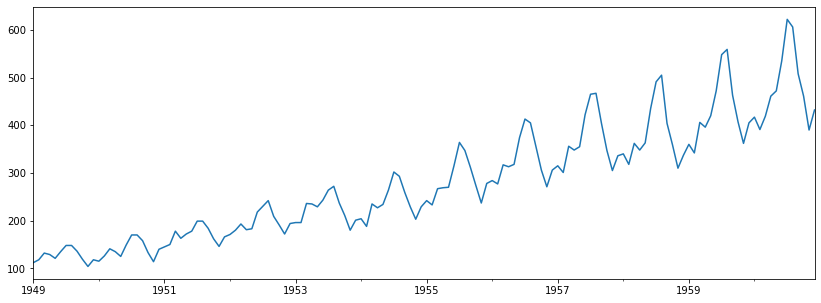

In [65]:
fig = plt.figure(figsize = (14, 5))
airpass.plot(ax = fig.add_subplot(111))
plt.show()

In [66]:
airpass.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [67]:
print(airpass.index.year)
print(airpass.index.month)

Int64Index([1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949, 1949,
            ...
            1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960],
           dtype='int64', length=144)
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', length=144)


In [68]:
data_to_plot = pd.pivot_table(airpass.to_frame(), index = airpass.index.month, columns = airpass.index.year)
data_to_plot.head()

value                                                       
   1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
1   112  115  145  171  196  204  242  284  315  340  360  417
2   118  126  150  180  196  188  233  277  301  318  342  391
3   132  141  178  193  236  235  267  317  356  362  406  419
4   129  135  163  181  235  227  269  313  348  348  396  461
5   121  125  172  183  229  234  270  318  355  363  420  472

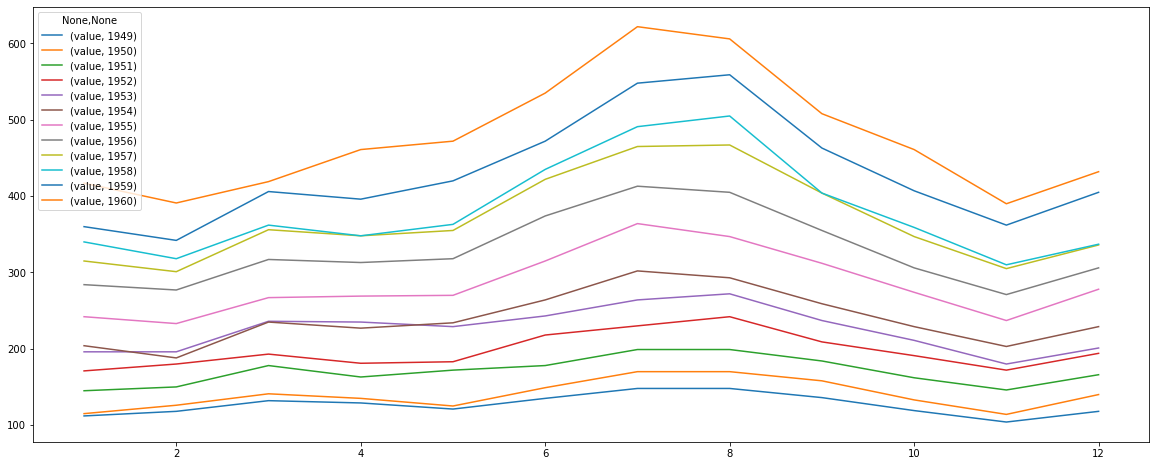

In [69]:
fig = plt.figure(figsize = (20, 8))
data_to_plot.plot(ax = fig.add_subplot(111))
plt.show()

AttributeError: 'Rectangle' object has no property 'normed'

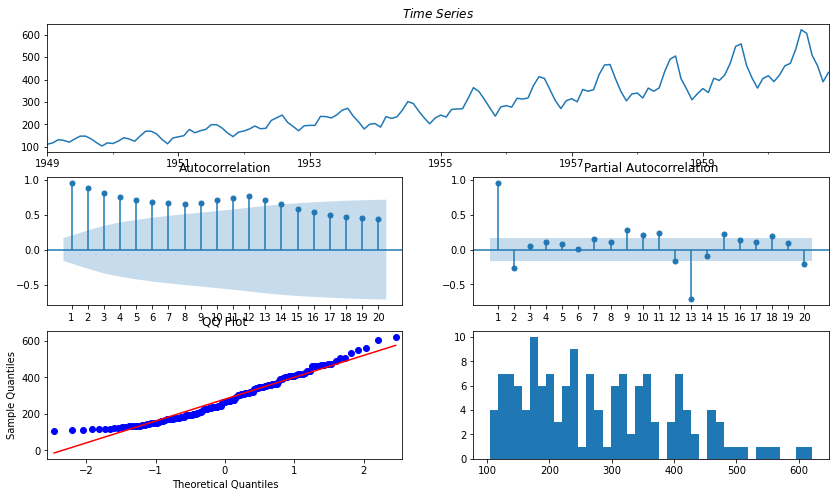

In [70]:
tsdisplay(airpass)

C:\Users\smhel\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


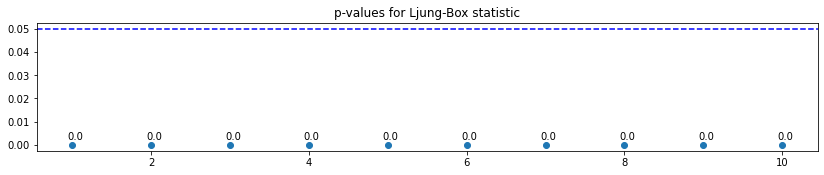

,1,2,3,4,5,6,7,8,9,10
Ljung-Box: X-squared,1.321415e+02,2.456462e+02,3.426748e+02,4.277387e+02,5.047966e+02,5.756019e+02,6.430386e+02,7.094845e+02,7.795912e+02,8.570686e+02
Ljung-Box: p-value,1.393231e-30,4.556318e-54,5.751088e-74,2.817731e-91,7.360195e-107,4.264008e-121,1.305463e-134,6.496271e-148,5.249370e-162,1.100789e-177
Box-Pierce: X-squared,1.294263e+02,2.398212e+02,3.335270e+02,4.150951e+02,4.884584e+02,5.553839e+02,6.186636e+02,6.805584e+02,7.453831e+02,8.164925e+02
Box-Pierce: p-value,5.471060e-30,8.384679e-53,5.499710e-72,1.522155e-88,2.473624e-103,9.752966e-117,2.327567e-129,1.095987e-141,1.203020e-154,5.870025e-169


In [71]:
tsdiag(airpass)

In [72]:
log_passengers = np.log(airpass)

AttributeError: 'Rectangle' object has no property 'normed'

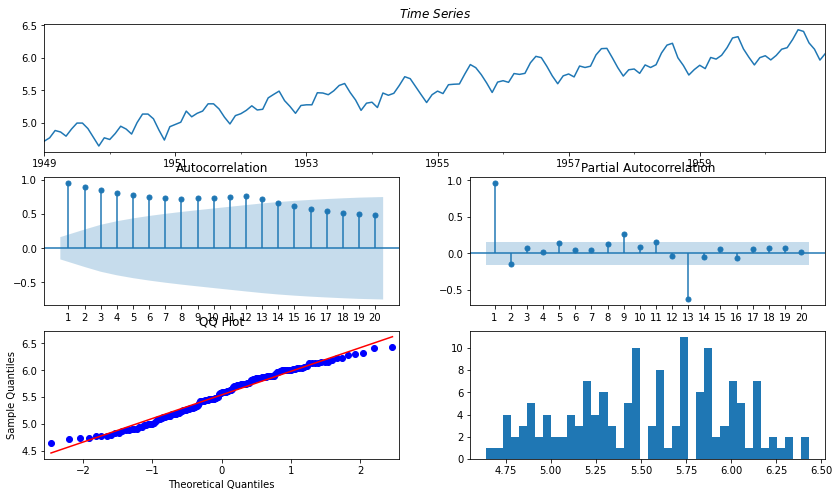

In [73]:
tsdisplay(log_passengers)

In [ ]:
print(airpass.min())

In [ ]:
decomposition_1  = smt.seasonal.seasonal_decompose(log_passengers, model = "additive", freq = 12, two_sided = True)
trend_1 = decomposition_1.trend

In [ ]:
plt.figure(figsize = (15, 6))
log_passengers.plot(label = "log of Airpassangers")
trend_1.plot(label = "Two-sided decomposition of the trend")
plt.legend()
plt.show()

In [ ]:
decomposition_2  = smt.seasonal.seasonal_decompose(log_passengers, model = "additive", freq = 12, two_sided = False)
trend_2 = decomposition_2.trend

In [ ]:
plt.figure(figsize = (15, 6))
log_passengers.plot(label = "log of Airpassangers")
trend_2.plot(label = "One-sided decomposition of the trend")
plt.legend()
plt.show()

In [ ]:
decomposition_3  = smt.seasonal.seasonal_decompose(log_passengers, model = "additive", freq = 3, two_sided = False)
trend_3 = decomposition_3.trend

plt.figure(figsize = (10, 6))
log_passengers.plot(label = "log of Airpassangers")
trend_3.plot(label = "One-sided decomposition of the trend with d = 3")
trend_2.plot(label = "One-sided decomposition of the trend woth period d = 12")
plt.legend()
plt.show()

In [ ]:
decomposition_4  = smt.seasonal.seasonal_decompose(log_passengers, model = "additive", freq = 24, two_sided = False)
trend_4 = decomposition_4.trend

plt.figure(figsize = (10, 6))
log_passengers.plot(label = "log of Airpassangers")
trend_4.plot(label = "One-sided decomposition of the trend with period d = 24")
trend_2.plot(label = "One-sided decomposition of the trend woth period d = 12")
plt.legend()
plt.show()

In [ ]:
import math as math

def moving_average_decompose(y, l = 12):
    tmp_index = y.index
    #Time Series:
    y = np.array(y)
    #Trend Component:
    t_two_side = pd.np.zeros(y.size)
    t_one_side = pd.np.zeros(y.size)
    tmp_val = 0
    #Loop through each time point:
    for j in range(0, y.size):
        ###########################################################
        # The length is even - use centered averaging:
        if l % 2 == 0:
            # The centered averaging method weights - see the formula example with l = 12.
            tmp_weights = np.concatenate([np.array([1 / (l * 2)]),
                                          np.repeat(1 / l, l - 1),
                                          np.array([1 / (l * 2)])])
            #Two-sided
            if j + 1 <= l / 2 or j + 1 > y.size - l / 2: 
                # We do not have enough data to the left or right of the series to calculate trend at time t = j:
                t_two_side[j] = np.nan
            else:
                tmp_val = y[int(j - (l / 2)):int(j + (l / 2 + 1))] * tmp_weights
                t_two_side[j] = tmp_val.sum()
            #One-sided
            if j + 1 <= l:
                t_one_side[j] = np.nan
            else:
                tmp_val = y[int(j - l):int(j + 1)] * tmp_weights
                t_one_side[j] = tmp_val.sum()
        ###########################################################
        # The length is odd:
        else:
            #For the non-centered averaging the weights are simply the mean, i.e. the length l.
            #tmp_weights = np.repeat(1 / l, l)
            #Two-sided
            if j + 1 <= math.floor(l / 2) or j + 1 > y.size - math.floor(l / 2):
                # We do not have enough data to the left or right of the series to calculate trend at time t = j:
                t_two_side[j] = np.nan
            else:
                tmp_val = y[int(j - math.floor(l / 2)):int(j + (math.floor(l / 2) + 1))]
                t_two_side[j] = tmp_val.mean()
            
            #One-sided
            if j * 2 <= l:
                t_one_side[j] = np.nan
            else:
                tmp_val = y[int(j - l + 1):int(j + 1)]
                t_one_side[j] = tmp_val.mean()
    #Return the same time series:
    t_one_side = pd.Series(t_one_side, name = "One-Sided MA with length = " + str(l))
    t_one_side.index = tmp_index
    t_two_side = pd.Series(t_two_side, name = "Two-Sided MA with length = " + str(l))
    t_two_side.index = tmp_index
    
    return {"Two-sided": t_two_side, "One-sided": t_one_side}

In [ ]:
decomposition_custom_1 = moving_average_decompose(log_passengers)
decomposition_custom_2 = moving_average_decompose(log_passengers, l = 3)
decomposition_custom_3 = moving_average_decompose(log_passengers, l = 24)

plt.figure(figsize = (20, 10))
log_passengers.plot()
decomposition_custom_1["One-sided"].plot()
decomposition_custom_1["Two-sided"].plot()
decomposition_custom_2["Two-sided"].plot()
decomposition_custom_3["One-sided"].plot()
plt.legend()
plt.show()

In [ ]:
comparison = decomposition_custom_1["Two-sided"] - trend_1
print("Two-Sided MA, l = 12: max. difference = ", round(comparison.max(), 5), "; min. difference = ", round(comparison.min(), 5))
comparison = decomposition_custom_1["One-sided"] - trend_2
print("One-Sided MA, l = 12: max. difference = ", round(comparison.max(), 5), "; min. difference = ", round(comparison.min(), 5))
comparison = decomposition_custom_2["One-sided"] - trend_3
print("One-Sided MA, l =  3: max. difference = ", round(comparison.max(), 5), "; min. difference = ", round(comparison.min(), 5))
comparison = decomposition_custom_3["One-sided"] - trend_4
print("One-Sided MA, l =  24: max. difference = ", round(comparison.max(), 5), "; min. difference = ", round(comparison.min(), 5))

In [ ]:
def decomp_seas(y, trend, period = 12, title = ""):
    #Initial seasonal component estimation:
    seas_0 = y - trend
    seas_1 = pd.np.zeros(period)
    #Seasonal component averaging:
    for j in range(0, period):
        #Select every j-th month from each year in the dataset:
        seas_1[j] = seas_0[j::period].mean()
    #Adjustment factor:
    w = seas_1.mean()
    seas_1 = seas_1 - w
    #Save the seasonal component in a time series format:
    seasonal_results = pd.np.zeros(y.size)
    for j in range(0, period):
        #Select every j-th month from each year in the dataset:
        seasonal_results[j::period] = seas_1[j]
    
    seasonal_results = pd.Series(seasonal_results, name = "Seasonal " + title)
    seasonal_results.index = trend.index
    return(seasonal_results)

In [ ]:
seas_results = {"One-sided": decomp_seas(y = log_passengers, trend = decomposition_custom_1["One-sided"], period = 12, title = "(One-sided)"),
                "Two-sided": decomp_seas(y = log_passengers, trend = decomposition_custom_1["Two-sided"], period = 12, title = "(Two-sided)")}

In [ ]:
plt.figure(figsize = (15, 6))
seas_results["One-sided"].plot()
seas_results["Two-sided"].plot()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
T_S = {"One-sided": decomposition_custom_1["One-sided"] + seas_results["One-sided"], "Two-sided": decomposition_custom_1["Two-sided"] + seas_results["Two-sided"]}
T_S["One-sided"].name = "Trend + Season"
T_S["Two-sided"].name = "Trend + Season"

In [ ]:
fig = plt.figure(figsize = (15, 8))
log_passengers.plot(ax = fig.add_subplot(211), label = "Log of Airpassangers", title = "One-sided decomposition")
decomposition_custom_1["One-sided"].plot()
T_S["One-sided"].plot()
plt.legend()
#
log_passengers.plot(ax = fig.add_subplot(212), label = "Log of Airpassangers", title = "Two-sided decomposition")
decomposition_custom_1["Two-sided"].plot()
T_S["Two-sided"].plot()
plt.legend()
#
plt.tight_layout()
plt.show()

In [ ]:
comparison = seas_results["Two-sided"] - decomposition_1.seasonal
print("Two-Sided MA, l = 12: max. difference = ", round(comparison.max(), 5), "; min. difference = ", round(comparison.min(), 5))
comparison = seas_results["One-sided"] - decomposition_2.seasonal
print("One-Sided MA, l = 12: max. difference = ", round(comparison.max(), 5), "; min. difference = ", round(comparison.min(), 5))

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(15, 8))
# Plot the series
decomposition_1.observed.plot(ax = ax[0])
decomposition_1.trend.plot(ax = ax[1])
decomposition_1.seasonal.plot(ax = ax[2])
decomposition_1.resid.plot(ax = ax[3])
# Add the labels to the Y-axis
ax[0].set_ylabel('Observed')
ax[1].set_ylabel('Trend')
ax[2].set_ylabel('Seasonal')
ax[3].set_ylabel('Residual')
# Fix layout
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize = (15, 6))
#
log_passengers.plot(ax = fig.add_subplot(211), label = "Log of Airpassangers", title = "One-sided decomposition")
decomposition_2.trend.plot(label = "Trend")
(decomposition_2.seasonal + decomposition_2.trend).plot(label = "Trend + Season")
plt.legend()
#
log_passengers.plot(ax = fig.add_subplot(212), label = "Log of Airpassangers", title = "Two-sided decomposition")
decomposition_1.trend.plot(label = "Trend")
(decomposition_1.seasonal + decomposition_1.trend).plot(label = "Trend + Season")
plt.legend()
#
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize = (15, 4))
(log_passengers - T_S["One-sided"]).plot(ax = fig.add_subplot(121), title = "One-sided decomposition Residuals")
(log_passengers - T_S["Two-sided"]).plot(ax = fig.add_subplot(122), title = "Two-sided decomposition Residuals")
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize = (15, 4))
decomposition_2.resid.plot(ax = fig.add_subplot(121), title = "One-sided decomposition Residuals")
decomposition_1.resid.plot(ax = fig.add_subplot(122), title = "Two-sided decomposition Residuals")
plt.tight_layout()
plt.show()

In [ ]:
print("Two-sided decomp. Variance for [1949-01-01 - 1954-01-01]: ", round(decomposition_1.resid.loc['19490101':'19540101'].var(), 6))
print("Two-sided decomp. Variance for [1954-02-01 - 1960-12-01]: ", round(decomposition_1.resid.loc['19540201':'19600101'].var(), 6))
print("-----------------------------------------------------------")
print("One-sided decomp. Variance for [1949-01-01 - 1954-01-01]: ", round(decomposition_2.resid.loc['19490101':'19540101'].var(), 6))
print("One-sided decomp. Variance for [1954-02-01 - 1960-12-01]: ", round(decomposition_2.resid.loc['19540201':'19600101'].var(), 6))

In [ ]:
fig = plt.figure(figsize = (14, 8))
fig = sm.graphics.tsa.plot_acf(decomposition_1.resid.dropna(), zero = False, lags=40, ax = fig.add_subplot(221), title = "ACF of Two-sided decomposition Residuals")
fig = sm.graphics.tsa.plot_acf(decomposition_2.resid.dropna(), zero = False, lags=40, ax = fig.add_subplot(222), title = "ACF of One-sided decomposition Residuals")
#
fig = sm.graphics.tsa.plot_acf(decomposition_1.resid.dropna(), zero = False, lags=40, ax = fig.add_subplot(223), title = "PACF of Two-sided decomposition Residuals")
fig = sm.graphics.tsa.plot_acf(decomposition_2.resid.dropna(), zero = False, lags=40, ax = fig.add_subplot(224), title = "PACF of One-sided decomposition Residuals")
#
plt.tight_layout()
plt.show()

In [ ]:
tsdisplay(airpass)

In [ ]:
AP = airpass

In [ ]:
#Create trend
time = np.array(range(1, len(airpass.index) + 1))
time_sq = time ** 2

In [ ]:
#Create a dummy variable matrix of zeroes:
dm = np.column_stack(np.zeros((11, airpass.size)))
#Create a DataFrame
dm = pd.DataFrame(dm)
#Add values to dummy variables:
for j in range(0, len(dm.columns)):
    #Select every j-th month from each year in the dataset:
    dm.iloc[j::12, j] = 1

In [ ]:
dm.head()

In [ ]:
dtf = np.column_stack((airpass, time, time_sq, dm))
#Create a DataFrame
dtf = pd.DataFrame(dtf)
#Rename the columns:
dtf.columns = ["AP"] + ["time"] + ["time_sq"] + ["dm_" + str(number) for number in range(1, 12)]
dtf.index = [str(number) for number in range(1, len(dtf.index) + 1)]
dtf.head(13)

In [ ]:
formula_2 = "AP ~ " + " + ".join(dtf.columns.intersection(dtf.columns.difference(["AP"])))
print(formula_2)

In [ ]:
formula_3 = "np.log(AP) ~ " + " + ".join(dtf.columns.intersection(dtf.columns.difference(["AP"])))
print(formula_3)

In [ ]:
AP_OLS_1 = smf.ols(formula = 'AP ~ time + time_sq', data = dtf)
print(AP_OLS_1.fit().summary().tables[1])

In [ ]:
AP_OLS_2 = smf.ols(formula = formula_2, data = dtf)
print(AP_OLS_2.fit().summary().tables[1])

In [ ]:
AP_OLS_3 = smf.ols(formula = formula_3, data = dtf)
print(AP_OLS_3.fit().summary().tables[1])

In [ ]:
fit_1 = AP_OLS_1.fit()
fit_2 = AP_OLS_2.fit()
fit_3 = AP_OLS_3.fit()

In [ ]:
dtf_forc = dtf.iloc[0:36, 1:]
dtf_forc.index = [str(number) for number in range(len(dtf.index) + 1, len(dtf.index) + len(dtf_forc) + 1)]

In [ ]:
dtf.tail()

In [ ]:
dtf_forc.head()

In [ ]:
dtf_forc["time"] = np.array(range(int(dtf_forc.index[0]), int(dtf_forc.index[-1]) + 1))
dtf_forc["time_sq"] = dtf_forc["time"] ** 2
dtf_forc.head()

In [ ]:
dtf_forc.loc[:, ["dm_1"]].head(15).T

In [ ]:
dtf_forc.loc[:, ["dm_1"]] = 0
dtf_forc.loc[:, ["dm_1"]].head(15).T

In [ ]:
dtf_forc.columns.get_loc("dm_1")

In [ ]:
dtf_forc.iloc[0::12, dtf_forc.columns.get_loc("dm_1")] = 1
dtf_forc.loc[:, ["dm_1"]].head(15).T

In [ ]:
for j, k in zip(range(0, 12), ["dm_" + str(number) for number in range(2, 12)]):
    print("First index of " + k + " is " + str(j))

In [ ]:
dtf_forc.iloc[0::4, :]

In [ ]:
dtf_forc.iloc[11, :]

In [ ]:
dtf_forc.iloc[11 + 12, :]

In [ ]:
for j, k in zip(range(0, 6), ["dm_" + str(number) for number in range(6, 12)]):
    print("First index of " + k + " is " + str(j))

In [ ]:
for j, k in zip(range(7, 12), ["dm_" + str(number) for number in range(1, 6)]):
    print("First index of " + k + " is " + str(j))

In [ ]:
for j, k in zip(range(0, 12), ["dm_" + str(number) for number in range(1, 12)]):
    print("First index of " + k + " is " + str(j))
    dtf_forc.iloc[j::12, dtf_forc.columns.get_loc(k)] = 0
    dtf_forc.iloc[j::12, dtf_forc.columns.get_loc(k)] = 1

In [ ]:
dtf_forc.head(24)

In [ ]:
#Calculate forecasts
AP_forc_1 =  fit_1.predict(dtf_forc)
AP_forc_2 =  fit_2.predict(dtf_forc)
AP_forc_3 =  fit_3.predict(dtf_forc)

In [ ]:
#Combine into a single time series with FITTED and FORECAST values:
AP_fited_1 = np.concatenate((fit_1.predict(), np.array(AP_forc_1)))
AP_fited_1 = pd.Series(AP_fited_1)

In [ ]:
AP_fited_1.index

In [ ]:
#Add the correct time index:
AP_fited_1.index = pd.date_range(start = "1949-01", periods = len(AP_fited_1.index), freq = "M").to_period()
AP_fited_1.index = AP_fited_1.index.to_timestamp()
AP_fited_1.name = "Fitted"

In [ ]:
AP_fited_1.index

In [ ]:
AP_fited_2 = np.concatenate((fit_2.predict(), np.array(AP_forc_2)))
AP_fited_2 = pd.Series(AP_fited_2)
AP_fited_2.index = AP_fited_1.index
AP_fited_2.name = AP_fited_1.name

In [ ]:
AP_fited_3 = np.concatenate((fit_3.predict(), np.array(AP_forc_3)))
AP_fited_3 = pd.Series(AP_fited_3)
AP_fited_3.index = AP_fited_1.index
AP_fited_3.name = AP_fited_1.name

In [ ]:
fig = plt.figure(figsize = (20, 6))
AP_fited_1.plot(ax = fig.add_subplot(131), linestyle = "--", title = "Quadratic")
airpass.plot(label = "Actual")
plt.legend()
#
AP_fited_2.plot(ax = fig.add_subplot(132), linestyle = "--", title = "Quadratic + Seasonal for Airpass")
airpass.plot(label = "Actual")
plt.legend()
#
AP_fited_3.plot(ax = fig.add_subplot(133), linestyle = "--", title = "Quadratic + Seasonal for log(Airpass)")
log_passengers.plot(label = "Actual")
plt.legend()
#
plt.tight_layout()
plt.show()

In [ ]:
def exp_smooth_simple(pars, y_t, return_type = "simple", forc_period = 12):
    a = pars[0]
    T = len(y_t)
    #print(T)
    new_y = np.zeros(T)
    for i in range(0, T): #note - the first element (when i = 0 is unchanged
        if i == 0:
            new_y[i] = y_t[i]
        else:
            new_y[i] = a * y_t[i] + (1.0 - a) * new_y[i-1]  
    
    #Forecast ahead:
    y_forc = np.zeros(forc_period)
    for j in range(0, forc_period):
        y_forc[j] = new_y[T - 1]
        
    if return_type == "simple":
        return new_y
    else:
        return {"Y": new_y, "Forecast": y_forc}

In [ ]:
smoothed_data_1 = exp_smooth_simple([0.1], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast")
smoothed_data_2 = exp_smooth_simple([0.5], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast")
smoothed_data_3 = exp_smooth_simple([0.8], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast")

In [ ]:
smoothed_data_1 = pd.Series(np.append(smoothed_data_1["Y"], smoothed_data_1["Forecast"]))
smoothed_data_2 = pd.Series(np.append(smoothed_data_2["Y"], smoothed_data_2["Forecast"]))
smoothed_data_3 = pd.Series(np.append(smoothed_data_3["Y"], smoothed_data_3["Forecast"]))

In [ ]:
smoothed_data_1.name = "alpha = 0.1"
smoothed_data_2.name = "alpha = 0.5"
smoothed_data_3.name = "alpha = 0.8"

In [ ]:
smoothed_data_1.index = pd.date_range(start = "1949-01", periods = len(smoothed_data_1.index), freq = "M").to_period()
smoothed_data_1.index = smoothed_data_1.index.to_timestamp()
#
smoothed_data_2.index = smoothed_data_3.index = smoothed_data_1.index

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(log_passengers, label = "Actual")
plt.plot(smoothed_data_1, linestyle = "--")
plt.plot(smoothed_data_2, linestyle = "--")
plt.plot(smoothed_data_3, linestyle = "--", color = "red")
plt.legend()
plt.show()

In [ ]:
airpass_smpl_exp = smt.holtwinters.SimpleExpSmoothing(log_passengers)

In [ ]:
airpass_smpl_exp_1 = airpass_smpl_exp.fit(smoothing_level = 0.1)
airpass_smpl_exp_2 = airpass_smpl_exp.fit(smoothing_level = 0.5)
airpass_smpl_exp_3 = airpass_smpl_exp.fit(smoothing_level = 0.8)

In [ ]:
# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(log_passengers, label = "Actual")
airpass_smpl_exp_1.fittedvalues.plot(label = "alpha = 0.1", linestyle = "--")
airpass_smpl_exp_2.fittedvalues.plot(label = "alpha = 0.5", linestyle = "--")
airpass_smpl_exp_3.fittedvalues.plot(label = "alpha = 0.8", linestyle = "--")
airpass_smpl_exp_1.forecast(steps = 12).plot(label = "Forecast: alpha = 0.1")
airpass_smpl_exp_2.forecast(steps = 12).plot(label = "Forecast: alpha = 0.5")
airpass_smpl_exp_3.forecast(steps = 12).plot(label = "Forecast: alpha = 0.8")
plt.legend()
plt.show()

In [ ]:
def exp_smooth_double(pars, y_t, return_type = "simple", forc_period = 12):
    a = pars[0]
    b = pars[1]
    T = len(y_t)
    new_y = np.zeros(T)
    new_f = np.zeros(T)
    
    for i in range(0, T):
        if i == 0:
            new_y[i] = y_t[i]
            new_f[i] = y_t[i]
        elif i == 1:
            new_y[i] = y_t[i]
            new_f[i] = y_t[i] - y_t[i-1]
        else:
            new_y[i] = a * y_t[i] + (1.0 - a) * (new_y[i-1] + new_f[i-1])
            new_f[i] = b * (new_y[i] - new_y[i-1]) + (1.0 -  b) * new_f[i-1]

    #Forecast ahead:
    y_forc = np.zeros(forc_period)
    for j in range(0, forc_period):
        y_forc[j] = new_y[T - 1] + (j + 1) * new_f[T - 1]
    
    if return_type == "simple":
        return new_y
    else:
        return {"Y": new_y, "F": new_f, "Forecast": y_forc}

In [ ]:
#Example of double exponential smoothing with different alpha parameters:
smoothed_data_1 = pd.Series(exp_smooth_double([0.1, 0.1], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast"))
smoothed_data_2 = pd.Series(exp_smooth_double([0.3, 0.1], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast"))
smoothed_data_3 = pd.Series(exp_smooth_double([0.6, 0.1], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast"))

In [ ]:
smoothed_data_1 = pd.Series(np.append(smoothed_data_1["Y"], smoothed_data_1["Forecast"]))
smoothed_data_2 = pd.Series(np.append(smoothed_data_2["Y"], smoothed_data_2["Forecast"]))
smoothed_data_3 = pd.Series(np.append(smoothed_data_3["Y"], smoothed_data_3["Forecast"]))

In [ ]:
smoothed_data_1.name = "alpha = 0.1, beta = 0.1"
smoothed_data_2.name = "alpha = 0.3, beta = 0.1"
smoothed_data_3.name = "alpha = 0.6, beta = 0.1"

In [ ]:
smoothed_data_1.index = pd.date_range(start = "1949-01", periods = len(smoothed_data_1.index), freq = "M").to_period()
smoothed_data_1.index = smoothed_data_1.index.to_timestamp()
smoothed_data_2.index = smoothed_data_3.index = smoothed_data_1.index

In [ ]:
fig = plt.figure(figsize = (20, 10))
plt.plot(log_passengers)
plt.plot(smoothed_data_1, linestyle = "--")
plt.plot(smoothed_data_2, linestyle = "--")
plt.plot(smoothed_data_3, linestyle = "--", color = "red")
plt.legend()
plt.show()

In [ ]:
#Example of double exponential smoothing with different beta parameters:
smoothed_data_1 = pd.Series(exp_smooth_double([0.1, 0.01], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast"))
smoothed_data_2 = pd.Series(exp_smooth_double([0.1, 0.3], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast"))
smoothed_data_3 = pd.Series(exp_smooth_double([0.1, 0.9], np.array(pd.Series.tolist(log_passengers)), return_type = "forcast"))

In [ ]:
smoothed_data_1 = pd.Series(np.append(smoothed_data_1["Y"], smoothed_data_1["Forecast"]))
smoothed_data_2 = pd.Series(np.append(smoothed_data_2["Y"], smoothed_data_2["Forecast"]))
smoothed_data_3 = pd.Series(np.append(smoothed_data_3["Y"], smoothed_data_3["Forecast"]))

In [ ]:
smoothed_data_1.name = "alpha = 0.1, beta = 0.01"
smoothed_data_2.name = "alpha = 0.1, beta = 0.3"
smoothed_data_3.name = "alpha = 0.1, beta = 0.9"

In [ ]:
smoothed_data_1.index = pd.date_range(start = "1949-01", periods = len(smoothed_data_1.index), freq = "M").to_period()
smoothed_data_1.index = smoothed_data_1.index.to_timestamp()
smoothed_data_2.index = smoothed_data_3.index = smoothed_data_1.index

In [ ]:
fig = plt.figure(figsize = (20, 10))
plt.plot(log_passengers)
plt.plot(smoothed_data_1, linestyle = "--")
plt.plot(smoothed_data_2, linestyle = "--")
plt.plot(smoothed_data_3, linestyle = "--", color = "red")
plt.legend()
plt.show()

In [ ]:
airpass_smpl_exp_x2 = smt.holtwinters.Holt(log_passengers)

In [ ]:
airpass_smpl_exp_x2_11 = airpass_smpl_exp_x2.fit(smoothing_level = 0.1, smoothing_slope = 0.1)
airpass_smpl_exp_x2_12 = airpass_smpl_exp_x2.fit(smoothing_level = 0.3, smoothing_slope = 0.1)
airpass_smpl_exp_x2_13 = airpass_smpl_exp_x2.fit(smoothing_level = 0.6, smoothing_slope = 0.1)
airpass_smpl_exp_x2_21 = airpass_smpl_exp_x2.fit(smoothing_level = 0.1, smoothing_slope = 0.01)
airpass_smpl_exp_x2_22 = airpass_smpl_exp_x2.fit(smoothing_level = 0.1, smoothing_slope = 0.3)
airpass_smpl_exp_x2_23 = airpass_smpl_exp_x2.fit(smoothing_level = 0.1, smoothing_slope = 0.9)

In [ ]:
fig = plt.figure(figsize = (20, 8))
fig.add_subplot(121)
plt.plot(log_passengers, label = "Actual")
airpass_smpl_exp_x2_11.fittedvalues.plot(label = "alpha = 0.1, beta = 0.1", linestyle = "--")
airpass_smpl_exp_x2_12.fittedvalues.plot(label = "alpha = 0.3, beta = 0.1", linestyle = "--")
airpass_smpl_exp_x2_13.fittedvalues.plot(label = "alpha = 0.6, beta = 0.1", linestyle = "--")
airpass_smpl_exp_x2_11.forecast(steps = 12).plot(label = "Forecast: alpha = 0.1, beta = 0.1")
airpass_smpl_exp_x2_12.forecast(steps = 12).plot(label = "Forecast: alpha = 0.3, beta = 0.1")
airpass_smpl_exp_x2_13.forecast(steps = 12).plot(label = "Forecast: alpha = 0.6, beta = 0.1")
plt.legend()
#
fig.add_subplot(122)
plt.plot(log_passengers, label = "Actual")
airpass_smpl_exp_x2_21.fittedvalues.plot(label = "alpha = 0.1, beta = 0.01", linestyle = "--")
airpass_smpl_exp_x2_22.fittedvalues.plot(label = "alpha = 0.1, beta = 0.3", linestyle = "--")
airpass_smpl_exp_x2_23.fittedvalues.plot(label = "alpha = 0.1, beta = 0.9", linestyle = "--")
airpass_smpl_exp_x2_21.forecast(steps = 12).plot(label = "Forecast: alpha = 0.1, beta = 0.01")
airpass_smpl_exp_x2_22.forecast(steps = 12).plot(label = "Forecast: alpha = 0.1, beta = 0.3")
airpass_smpl_exp_x2_23.forecast(steps = 12).plot(label = "Forecast: alpha = 0.1, beta = 0.9")
plt.legend()
plt.show()

In [ ]:
airpass_smpl_exp_hw = smt.holtwinters.ExponentialSmoothing(log_passengers)
airpass_smpl_exp_hw_1 = airpass_smpl_exp_hw.fit()

In [ ]:
airpass_smpl_exp_hw2 = smt.holtwinters.ExponentialSmoothing(log_passengers, seasonal = "additive", seasonal_periods = 12)
airpass_smpl_exp_hw_2 = airpass_smpl_exp_hw2.fit()

In [ ]:
airpass_smpl_exp_hw3 = smt.holtwinters.ExponentialSmoothing(log_passengers, seasonal = "multiplicative", seasonal_periods = 12)
airpass_smpl_exp_hw_3 = airpass_smpl_exp_hw3.fit()

In [ ]:
fig = plt.figure(figsize = (20, 8))
fig.add_subplot(111)
plt.plot(log_passengers, label = "Actual")
airpass_smpl_exp_hw_1.fittedvalues.plot(label = "Holt-Winter's Exponential Smoothing: No season specification", linestyle = "--")
airpass_smpl_exp_hw_2.fittedvalues.plot(label = "Holt-Winter's Exponential Smoothing: with additive season specification", linestyle = "--")
airpass_smpl_exp_hw_3.fittedvalues.plot(label = "Holt-Winter's Exponential Smoothing: with multiplicative season specification", linestyle = "--")
airpass_smpl_exp_hw_1.forecast(steps = 12).plot(label = "HW: no season spec")
airpass_smpl_exp_hw_2.forecast(steps = 12).plot(label = "HW: with additive season spec", marker = "x")
airpass_smpl_exp_hw_3.forecast(steps = 12).plot(label = "HW: with multiplicative season spec", marker = "x")
plt.legend()
plt.show()

In [ ]:
resid_OLS = fit_3.resid
tsdisplay(resid_OLS, lags = 30)

In [ ]:
resid_exp_x2 = log_passengers - airpass_smpl_exp_x2_13.fittedvalues
tsdisplay(resid_exp_x2, lags = 30)

In [ ]:
resid_hw = log_passengers - airpass_smpl_exp_hw_3.fittedvalues
tsdisplay(resid_hw, lags = 30)

In [ ]:
tsdiag(resid_hw)

In [ ]:
resid_mdl_order = sm.tsa.stattools.arma_order_select_ic(resid_hw, ic = 'aic', trend = 'nc')
resid_mdl_order

In [ ]:
resid_mdl_order.aic_min_order

In [ ]:
AP_OLS_trend = smf.ols(formula = 'np.log(AP) ~ time + time_sq', data = dtf)
AP_OLS_trend_fit = AP_OLS_trend.fit()
print(AP_OLS_trend_fit.summary().tables[1])

In [ ]:
tsdisplay(AP_OLS_trend_fit.resid, lags = 25)

In [ ]:
resid_sarima = sm.tsa.statespace.SARIMAX(AP_OLS_trend_fit.resid, order=(2, 0, 2), seasonal_order=(1, 0, 1, 12))
resid_sarima_fit = resid_sarima.fit()

In [ ]:
print(resid_sarima_fit.summary())

In [ ]:
tsdisplay(resid_sarima_fit.resid)

In [ ]:
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = sm.tools.sm_exceptions.ValueWarning)
warnings.filterwarnings("ignore", category = sm.tools.sm_exceptions.HessianInversionWarning)
warnings.filterwarnings("ignore", category = sm.tools.sm_exceptions.ConvergenceWarning)

In [ ]:
# Specify the best AIC - default is infinite - so anything lower is better
best_aic = None
# Specify the best order
best_order = None
# Specify the best model
best_mdl = None
# Loop through different (p, q) combinations, starting from SARMA(0, 0)(0, 0), to SARMA(1, 1)(1, 1)
pq_rng = range(2) # range(5) would be [0,1,2,3,4]
for p in pq_rng:
    for q in pq_rng:
        for P in pq_rng:
            for Q in pq_rng:
                try:
                    tmp_mdl = sm.tsa.statespace.SARIMAX(AP_OLS_trend_fit.resid, 
                                                        order=(p, 0, q),
                                                        seasonal_order=(P, 0, Q, 12))
                    tmp_mdl_fit = tmp_mdl.fit()
                    tmp_aic = tmp_mdl_fit.aic
                    if best_aic == None:
                        best_aic = tmp_aic
                        best_order = {"Nonseasonal": (p, 0, q), "Seasonal": (P, 0, Q)}
                        best_mdl = tmp_mdl
                        print("Fitted an ARMA(" + str(p) + ", " + str(q) + ")(" + 
                              str(P) + ", " + str(Q) + ")_12 model - it was better")
                    elif tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = {"Nonseasonal": (p, 0, q), "Seasonal": (P, 0, Q)}
                        best_mdl = tmp_mdl
                        print("Fitted an ARMA(" + str(p) + ", " + str(q) + ")(" + 
                              str(P) + ", " + str(Q) + ")_12 model - it was better")
                    else:
                        print("Fitted an ARMA(" + str(p) + ", " + str(q) + ")(" + 
                              str(P) + ", " + str(Q) + ")_12 model - it was worse")
                except: continue

In [ ]:
print(tmp_mdl_fit.summary())

In [ ]:
tsdisplay(tmp_mdl_fit.resid)

In [ ]:
pd.DataFrame([[resid_sarima_fit.aic, tmp_mdl_fit.aic], 
              [resid_sarima_fit.bic, tmp_mdl_fit.bic]], 
             index = ["AIC", "BIC"], columns = ["Manual", "Auto"])

In [ ]:
Y_fit = np.exp(AP_OLS_trend_fit.fittedvalues + resid_sarima_fit.fittedvalues)

In [ ]:
Y_fit = pd.Series(Y_fit)
Y_fit.index = airpass.index

In [ ]:
Y_trend = np.exp(AP_OLS_trend_fit.fittedvalues)
Y_trend = pd.Series(Y_trend)
Y_trend.index = airpass.index

In [ ]:
fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(111)
#
airpass.plot(label = "Actual", ax = ax1)
Y_fit.plot(label = "Fitted", ax = ax1)
Y_trend.plot(label = "Estimated Trend", ax = ax1)
plt.title("Actual vs fitted plot")
plt.legend()
plt.show()

In [ ]:
dtf.tail()

In [ ]:
time_forc = np.array(list(range(145, 145 + 20)))

In [ ]:
dt_forc = pd.DataFrame([time_forc, time_forc**2], index = ["time", "time_sq"])

In [ ]:
dt_forc.head()

In [ ]:
dt_forc = dt_forc.T

In [ ]:
dt_forc.head()

In [ ]:
trend_forc = AP_OLS_trend_fit.predict(dt_forc)

In [ ]:
trend_forc.head()

In [ ]:
resid_forc = resid_sarima_fit.forecast(steps = len(dt_forc))

In [ ]:
resid_forc.head()

In [ ]:
# the last date in the historical data
airpass.index[-1]

In [ ]:
forc_index = pd.date_range(start = airpass.index[-1] + 1, periods = len(resid_forc.index), freq = "M").to_period()
forc_index = forc_index.to_timestamp()

In [ ]:
forc_index

In [ ]:
resid_forc.index = forc_index
trend_forc.index = forc_index

In [ ]:
np.exp(resid_forc + trend_forc).head()

In [ ]:
(np.exp(resid_forc) * np.exp(trend_forc)).head()

In [ ]:
Y_forc = np.exp(resid_forc + trend_forc)

In [ ]:
pd.Series(Y_forc)

In [ ]:
fig = plt.figure(figsize = (20, 6))
ax1 = fig.add_subplot(111)
#
airpass.plot(label = "Actual", ax = ax1)
Y_fit.plot(label = "Fitted", ax = ax1)
Y_forc.plot(label = "Forecast", ax = ax1)
#
plt.legend()
plt.show()

In [ ]:
airpass_ks = sm.nonparametric.KernelReg(endog = airpass, exog = time, var_type = "c", reg_type = "lc")

In [ ]:
airpass_ks_fit = airpass_ks.fit()

In [ ]:
airpass_ks_smoothed = pd.Series(airpass_ks_fit[0])
airpass_ks_smoothed.index = airpass.index

In [ ]:
airpass_ma  = smt.seasonal.seasonal_decompose(airpass, model = "muliplicative", freq = 12, two_sided = False)
airpass_ma_smoothed = airpass_ma.trend

In [ ]:
plt.figure(figsize = (20, 6))
#
plt.plot(airpass, label = "Actual")
plt.plot(airpass_ks_smoothed, label = "Kernel Smoothing")
plt.plot(airpass_ma_smoothed, label = "Moving Average")
#
plt.legend()
plt.show()

In [ ]:
airpass_lowess = sm.nonparametric.lowess(endog = airpass, exog = time)

In [ ]:
airpass_lowess_smoothed = pd.Series(airpass_lowess[:, 1])
airpass_lowess_smoothed.index = airpass.index

In [ ]:
airpass_lowess_5pct = sm.nonparametric.lowess(endog = airpass, exog = time, frac = 0.05)

In [ ]:
airpass_lowess_5pct_smoothed = pd.Series(airpass_lowess_5pct[:, 1])
airpass_lowess_5pct_smoothed.index = airpass.index

In [ ]:
plt.figure(figsize = (20, 8))
#
plt.plot(airpass, label = "Actual")
plt.plot(airpass_ks_smoothed, label = "Kernel Smoothing")
plt.plot(airpass_ma_smoothed, label = "Moving Average")
plt.plot(airpass_lowess_smoothed, label = "LOWESS, default (2/3) obs. smoothing")
plt.plot(airpass_lowess_5pct_smoothed, label = "LOWESS, 5% obs. smoothing", color = "red", linestyle = "--")
#
plt.legend()
plt.show()

In [ ]:
from patsy import dmatrix

In [ ]:
transformed_x2 = dmatrix("cr(time, df = 3)", {"time": time}, return_type = 'dataframe')
transformed_x2.index = airpass.index

In [ ]:
airpass_cubic_spline = sm.GLM(airpass, transformed_x2)
airpass_cubic_smoothed = airpass_cubic_spline.fit()

In [ ]:
plt.figure(figsize = (20, 4))
#
plt.plot(airpass, label = "Actual")
plt.plot(airpass_cubic_smoothed.fittedvalues, label = "Cubic Smoothing Splines")
#
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (20, 8))
#
plt.plot(airpass, label = "Actual")
plt.plot(airpass_ks_smoothed, label = "Kernel Smoothing")
plt.plot(airpass_ma_smoothed, label = "Moving Average")
plt.plot(airpass_lowess_smoothed, label = "LOWESS, default (2/3) obs. smoothing")
plt.plot(airpass_cubic_smoothed.fittedvalues, label = "Cubic Smoothing Splines")
#
plt.legend()
plt.show()